# 实验2 电阻的温度特性
> Copyright(c) 2022 GeorgeDong32. All Rights Reserved.

## 测量铜电阻、NTC、PTC的温度特性

In [284]:
from cProfile import label
import scipy.constants as cst 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# plt防止中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [285]:
#拟合函数定义
def RCu(t,a,R0):
    return a*t*R0 + R0

def lnRNTC(T,A,B):
    return B/T + np.log(A)

def lnRPTC(T,A,B):
    return np.log(A) + B * T

In [286]:
#读取数据
dCu = pd.read_csv("Cu.csv")
dNTC = pd.read_csv("NTC.csv")
dPTC = pd.read_csv("PTC.csv")

tCu = dCu.iloc[:,0]
rCu = (dCu.iloc[:,1] + dCu.iloc[:,2]) / 2

TNTC = dNTC.iloc[:,0] + 273
rNTC = (dNTC.iloc[:,1] + dNTC.iloc[:,2]) / 2
lnrNTC = np.log(rNTC)

TPTC = (dPTC.iloc[:,0] + 244)
rPTC = (dPTC.iloc[:,1] + dPTC.iloc[:,2]) / 2
lnrPTC = np.log(rPTC)

popt1,pcov1=curve_fit(RCu,tCu,rCu)
rCu_fit = RCu(tCu,popt1[0],popt1[1])

popt2,pcov2=curve_fit(lnRNTC,TNTC,lnrNTC)
lnrNTC_fit = lnRNTC(TNTC,popt2[0],popt2[1])

popt3,pcov3=curve_fit(lnRPTC,TPTC,lnrPTC)
lnrPTC_fit = lnRPTC(TPTC,popt3[0],popt3[1])

C:\Users\GeorgeDong\AppData\Local\Temp\ipykernel_94012\2662847338.py:6: RuntimeWarning: invalid value encountered in log
  return B/T + np.log(A)


### 铜电阻图像

0     55.030
1     55.175
2     55.350
3     55.640
4     55.825
5     56.015
6     56.235
7     56.460
8     56.665
9     56.875
10    57.120
11    57.325
12    57.560
13    57.790
14    57.970
dtype: float64


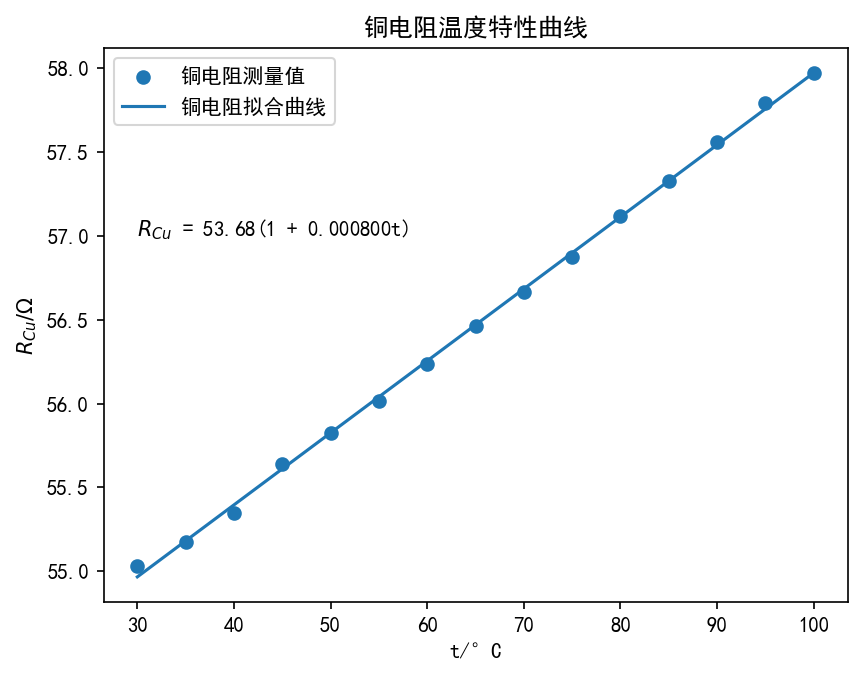

In [287]:
plt.figure(dpi=150)
plt.scatter(tCu,rCu,label="铜电阻测量值")
plt.plot(tCu,rCu_fit,label="铜电阻拟合曲线")
plt.title("铜电阻温度特性曲线")
plt.xlabel("t/°C")
plt.ylabel("$R_{Cu}/\Omega$")
plt.annotate("$R_{Cu}$ = %.2f(1 + %.6ft)" %(popt1[1],popt1[0]), xy=(30,57))
plt.legend()
print(rCu)

### NTC电阻图像

0.039638582676990476
0     2558.45
1     2212.65
2     1951.90
3     1665.85
4     1468.55
5     1262.20
6     1074.35
7      867.10
8      766.45
9      678.95
10     583.40
11     512.35
12     447.35
13     376.85
14     307.00
dtype: float64


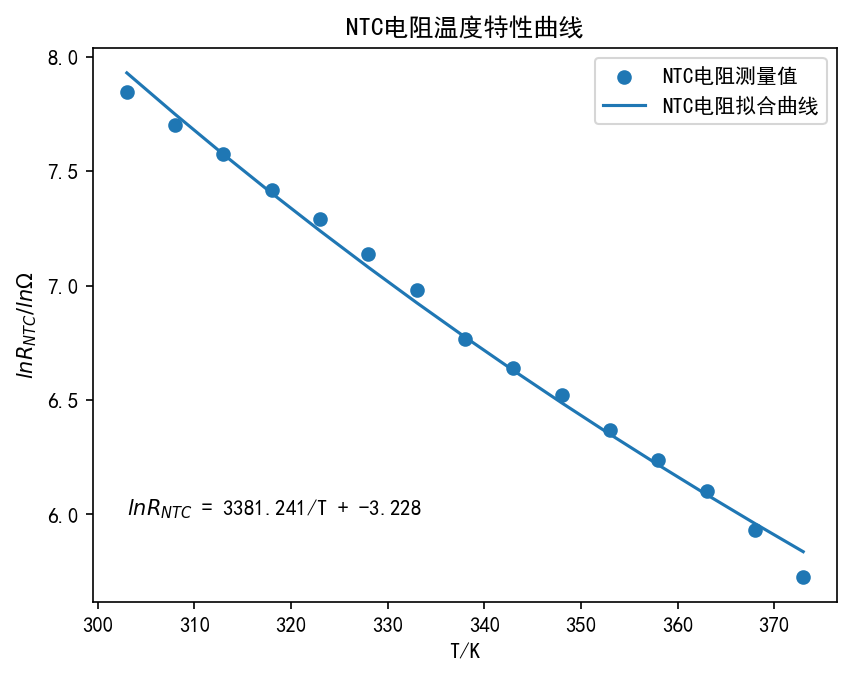

In [288]:
plt.figure(dpi=150)
plt.scatter(TNTC,lnrNTC,label="NTC电阻测量值")
plt.plot(TNTC,lnrNTC_fit,label="NTC电阻拟合曲线")
plt.title("NTC电阻温度特性曲线")
plt.xlabel("T/K")
plt.ylabel("$lnR_{NTC}/ln \Omega$")
plt.annotate("$lnR_{NTC}$ = %.3f/T + %.3f" %(popt2[1],np.log(popt2[0])), xy=(303,6))
plt.legend()
print(popt2[0])
print(rNTC)

### PTC电阻图像

0      357.485
1      403.370
2      455.415
3      519.845
4      593.175
5      673.475
6      764.170
7      883.200
8     1010.125
9     1138.500
10    1284.350
11    1436.700
12    1606.750
13    1806.800
14    2028.200
dtype: float64


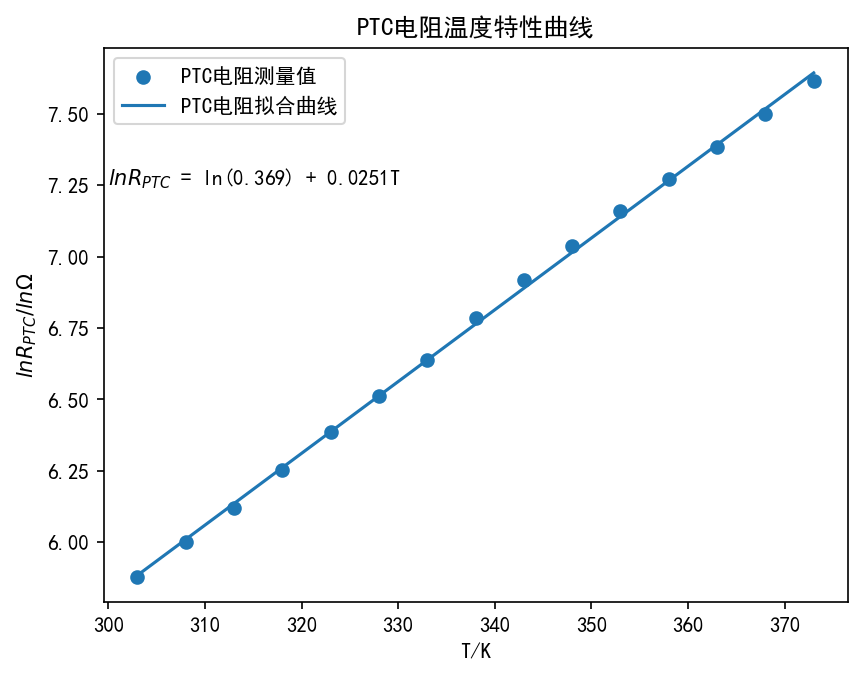

In [289]:
plt.figure(dpi=150)
plt.scatter(TPTC+29,lnrPTC,label="PTC电阻测量值")
plt.plot(TPTC+29,lnrPTC_fit,label="PTC电阻拟合曲线")
plt.title("PTC电阻温度特性曲线")
plt.xlabel("T/K")
plt.ylabel("$lnR_{PTC}/ln\Omega$")
plt.annotate("$lnR_{PTC}$ = ln(%.3f) + %.4fT" %(popt3[0],popt3[1]), xy=(300,7.25))
plt.legend()
print(rPTC)

### 铜电阻数据计算（逐差法）

In [290]:
i = 7
sum = 0
while (i > 0):
    sum += rCu[i+7] - rCu[i]
    i = i - 1
aCu = sum / (7 * 35) 
print(aCu/55)
print(TNTC)

0.0007870129870129873
0     303
1     308
2     313
3     318
4     323
5     328
6     333
7     338
8     343
9     348
10    353
11    358
12    363
13    368
14    373
Name: t, dtype: int64


### 补充图像

#### $R_{NTC} - T$

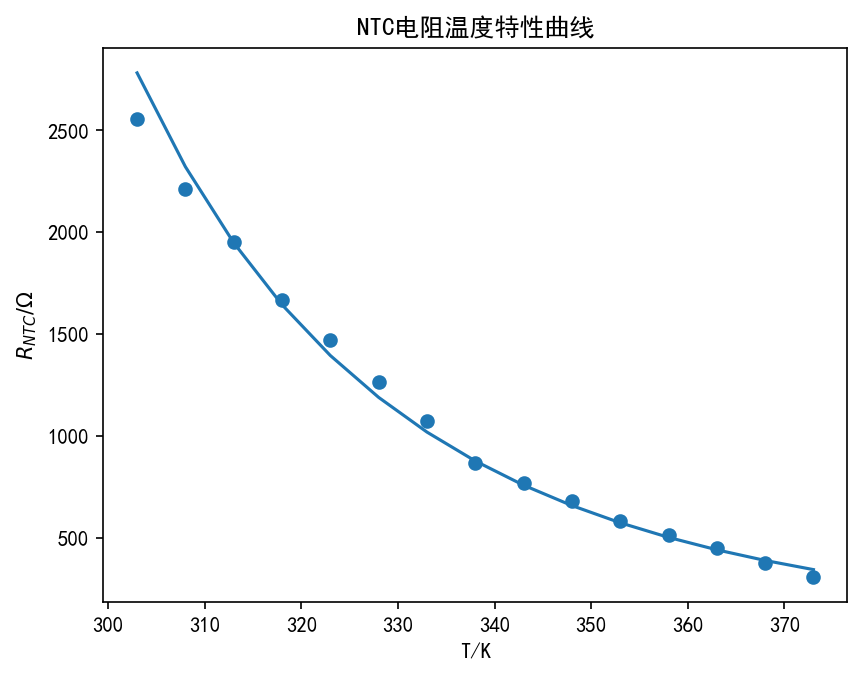

In [291]:
plt.figure(dpi=150)
plt.scatter(TNTC,rNTC,label="NTC电阻测量值")
plt.plot(TNTC,np.exp(lnrNTC_fit),label="NTC电阻拟合曲线")
plt.title("NTC电阻温度特性曲线")
plt.xlabel("T/K")
plt.ylabel("$R_{NTC}/ \Omega$")
#plt.annotate("$lnR_{NTC}$ = %.3f/T + %.3f" %(popt2[1],np.log(popt2[0])), xy=(303,6))
plt.savefig("NTC电阻温度特性曲线.png")

#### $lnR_{NTC}-\frac{1}{T}$

0    -0.036829
1    -0.035643
2    -0.034513
3    -0.033436
4    -0.032409
5    -0.031429
6    -0.030492
7    -0.029596
8    -0.028740
9    -0.027920
10   -0.027135
11   -0.026382
12   -0.025660
13   -0.024968
14   -0.024303
Name: t, dtype: float64


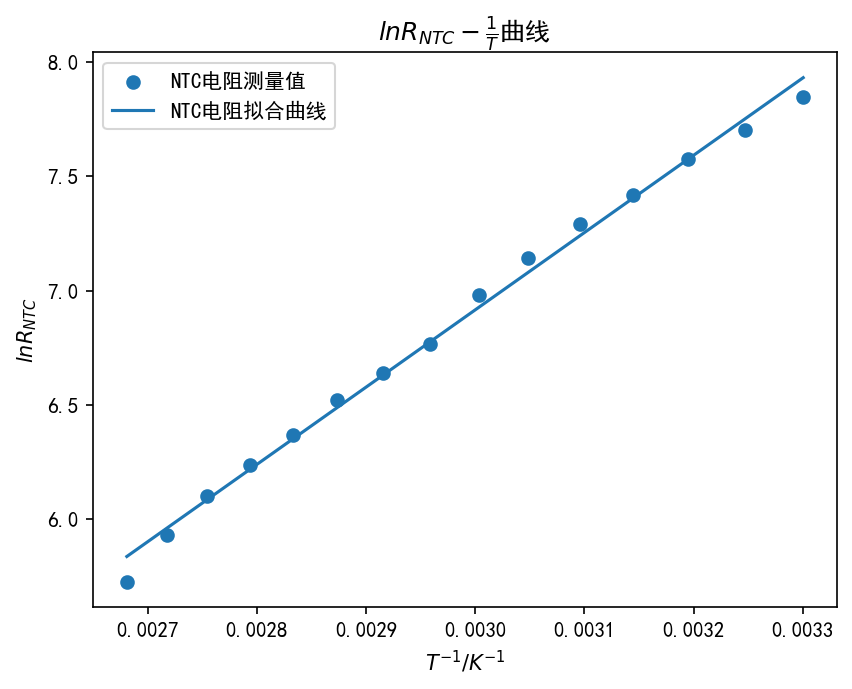

In [292]:
plt.figure(dpi=150)
plt.scatter(1/TNTC,lnrNTC,label="NTC电阻测量值")
plt.plot(1/TNTC,lnrNTC_fit,label="NTC电阻拟合曲线")
plt.title("$lnR_{NTC}-\\frac{1}{T}$曲线")
plt.xlabel("$T^{-1}/K^{-1}$")
plt.ylabel("$lnR_{NTC}$")
#plt.annotate("$lnR_{NTC}$ = %.3f/T + %.3f" %(popt2[1],np.log(popt2[0])), xy=(303,6))
plt.legend()
plt.savefig("lnRNTC-T-1.png")
print(-3381.21/TNTC**2)

#### $R_{PTC} - T$

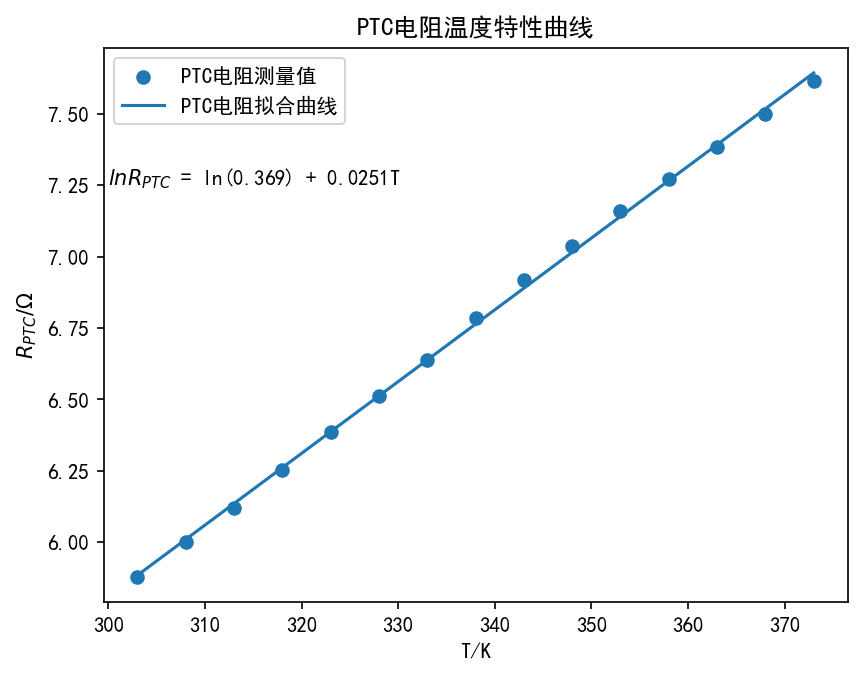

In [293]:
plt.figure(dpi=150)
plt.scatter(TPTC+29,rPTC,label="PTC电阻测量值")
plt.plot(TPTC+29,np.exp(rPTC_fit),label="PTC电阻拟合曲线")
plt.title("PTC电阻温度特性曲线")
plt.xlabel("T/K")
plt.ylabel("$R_{PTC}/ \Omega$")
plt.annotate("$lnR_{PTC}$ = ln(%.3f) + %.4fT" %(popt3[0],popt3[1]), xy=(300,7.25))
plt.legend()

#### $ln(R_{PTC})-T$

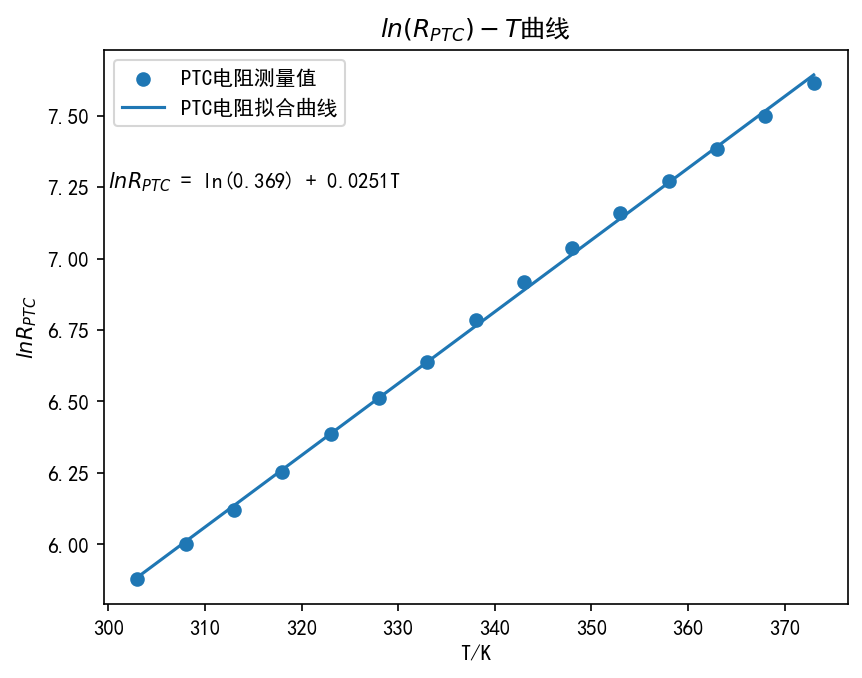

In [294]:
plt.figure(dpi=150)
plt.scatter(TPTC+29,lnrPTC,label="PTC电阻测量值")
plt.plot(TPTC+29,lnrPTC_fit,label="PTC电阻拟合曲线")
plt.title("$ln(R_{PTC})-T$曲线")
plt.xlabel("T/K")
plt.ylabel("$lnR_{PTC}$")
plt.annotate("$lnR_{PTC}$ = ln(%.3f) + %.4fT" %(popt3[0],popt3[1]), xy=(300,7.25))
plt.legend()
plt.savefig("lnRPTC-T.png")